In [6]:
!python tools/train.py data/rtmdet_tiny_ear.py

^C


##### 在mmdetection文件夹下建立该jupyter源文件运行程序
##### 训练数据集在mmdetection/data/Ear210_Keypoint_Dataset_coco中
##### 自制的预测图片在mmdetection/data/test_ear中
##### config配置文件下载到mmdetection/data中

### 测试集上评估模型精度

In [47]:
!python tools/test.py data/rtmdet_tiny_ear.py \
                      work_dirs/rtmdet_tiny_ear/best_coco_bbox_mAP_epoch_175.pth

06/04 17:49:35 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 1446792844
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.30.30706 版
    GCC: n/a
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,cod

### 可视化训练日志

In [48]:
#导入工具包
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [49]:
#载入训练日志
# 日志文件路径
log_path = 'work_dirs/rtmdet_tiny_ear/20230604_131303/vis_data/scalars.json'
with open(log_path, "r") as f:
    json_list = f.readlines()
len(json_list)

4257

In [50]:
eval(json_list[4])

{'lr': 1.6055855855855853e-05,
 'data_time': 2.8153557777404785,
 'loss': 0.10211258381605148,
 'loss_cls': 0.06993041038513184,
 'loss_bbox': 0.032182172127068046,
 'time': 4.104980373382569,
 'epoch': 1,
 'memory': 2664,
 'step': 5}

In [51]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/bbox_mAP' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 4257/4257 [00:03<00:00, 1077.06it/s]


In [52]:
df_train

,data_time,epoch,loss,loss_bbox,loss_cls,lr,memory,step,time
0,14.029937,1.0,0.112575,0.042543,0.070032,4.000000e-08,2626.0,1.0,19.507623
1,7.017462,1.0,0.104234,0.034217,0.070017,4.043964e-06,2664.0,2.0,9.864531
2,4.681954,1.0,0.108884,0.038889,0.069995,8.047928e-06,2664.0,3.0,6.664441
3,3.515455,1.0,0.100791,0.030846,0.069946,1.205189e-05,2664.0,4.0,5.061661
4,2.815356,1.0,0.102113,0.032182,0.069930,1.605586e-05,2664.0,5.0,4.104980
...,...,...,...,...,...,...,...,...,...
4195,0.207724,200.0,0.402701,0.266336,0.136365,3.058193e-03,2664.0,4196.0,0.429929
4196,0.207325,200.0,0.400465,0.264804,0.135660,3.056557e-03,2664.0,4197.0,0.429491
4197,0.207305,200.0,0.401019,0.265070,0.135949,3.054919e-03,2664.0,4198.0,0.429172
4198,0.207288,200.0,0.402878,0.266304,0.136574,3.053280e-03,2664.0,4199.0,0.428493


In [53]:
df_test

,coco/bbox_mAP,coco/bbox_mAP_50,coco/bbox_mAP_75,coco/bbox_mAP_l,coco/bbox_mAP_m,coco/bbox_mAP_s,data_time,step,time
0,0.048,0.183,0.005,0.048,-1.0,-1.0,0.807193,5.0,0.887340
1,0.138,0.429,0.043,0.138,-1.0,-1.0,0.267612,10.0,0.325549
2,0.391,0.681,0.427,0.391,-1.0,-1.0,0.267473,15.0,0.311530
3,0.379,0.884,0.272,0.379,-1.0,-1.0,0.252074,20.0,0.315739
4,0.416,0.902,0.316,0.416,-1.0,-1.0,0.272185,25.0,0.317570
5,0.524,0.924,0.535,0.524,-1.0,-1.0,0.267465,30.0,0.318071
6,0.461,0.968,0.308,0.461,-1.0,-1.0,0.264203,35.0,0.308848
7,0.341,0.885,0.298,0.341,-1.0,-1.0,0.249663,40.0,0.311089
8,0.589,0.930,0.699,0.589,-1.0,-1.0,0.265813,45.0,0.310713
9,0.678,0.968,0.824,0.678,-1.0,-1.0,0.256489,50.0,0.319479


In [54]:
#导出训练日志表格
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

##### 可视化辅助函数

In [55]:
#设置Matplotlib中文字体
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

In [56]:

from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

#### 训练集损失函数

In [57]:
df_train.columns

Index(['data_time', 'epoch', 'loss', 'loss_bbox', 'loss_cls', 'lr', 'memory',
       'step', 'time'],
      dtype='object')

In [58]:
metrics = ['loss', 'loss_bbox', 'loss_cls']

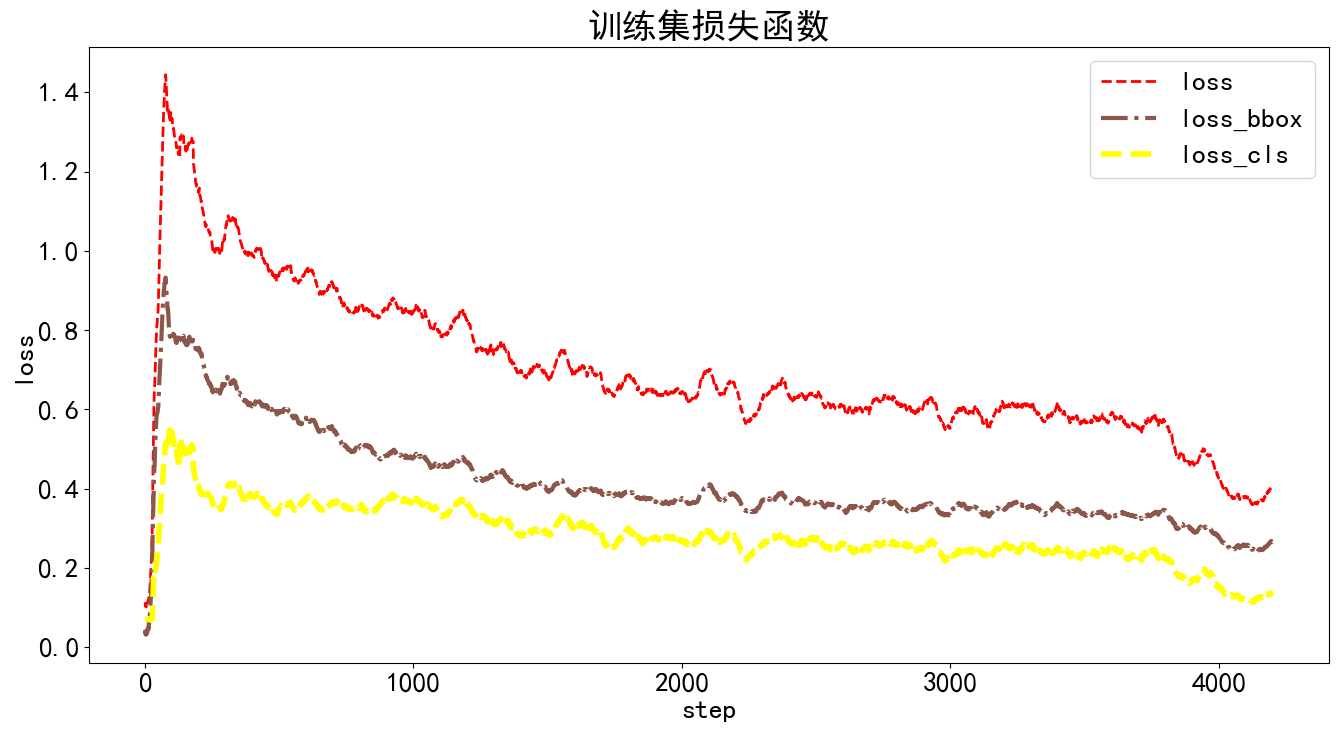

In [29]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 训练集准确率

In [42]:
#日志文件中没有'acc'列
#metrics = ['acc']

In [43]:
# plt.figure(figsize=(16, 8))

# x = df_train['step']
# for y in metrics:
#     plt.plot(x, df_train[y], label=y, **get_line_arg())

# plt.tick_params(labelsize=20)
# plt.xlabel('step', fontsize=20)
# plt.ylabel('loss', fontsize=20)
# plt.title('训练集准确率', fontsize=25)
# plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

# plt.legend(fontsize=20)

# plt.show()

####  测试集评估指标-MS COCO Metric

In [59]:
df_test.columns

Index(['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75',
       'coco/bbox_mAP_l', 'coco/bbox_mAP_m', 'coco/bbox_mAP_s', 'data_time',
       'step', 'time'],
      dtype='object')

In [60]:
metrics =['coco/bbox_mAP', 'coco/bbox_mAP_50', 'coco/bbox_mAP_75', 'coco/bbox_mAP_s', 'coco/bbox_mAP_m', 'coco/bbox_mAP_l']

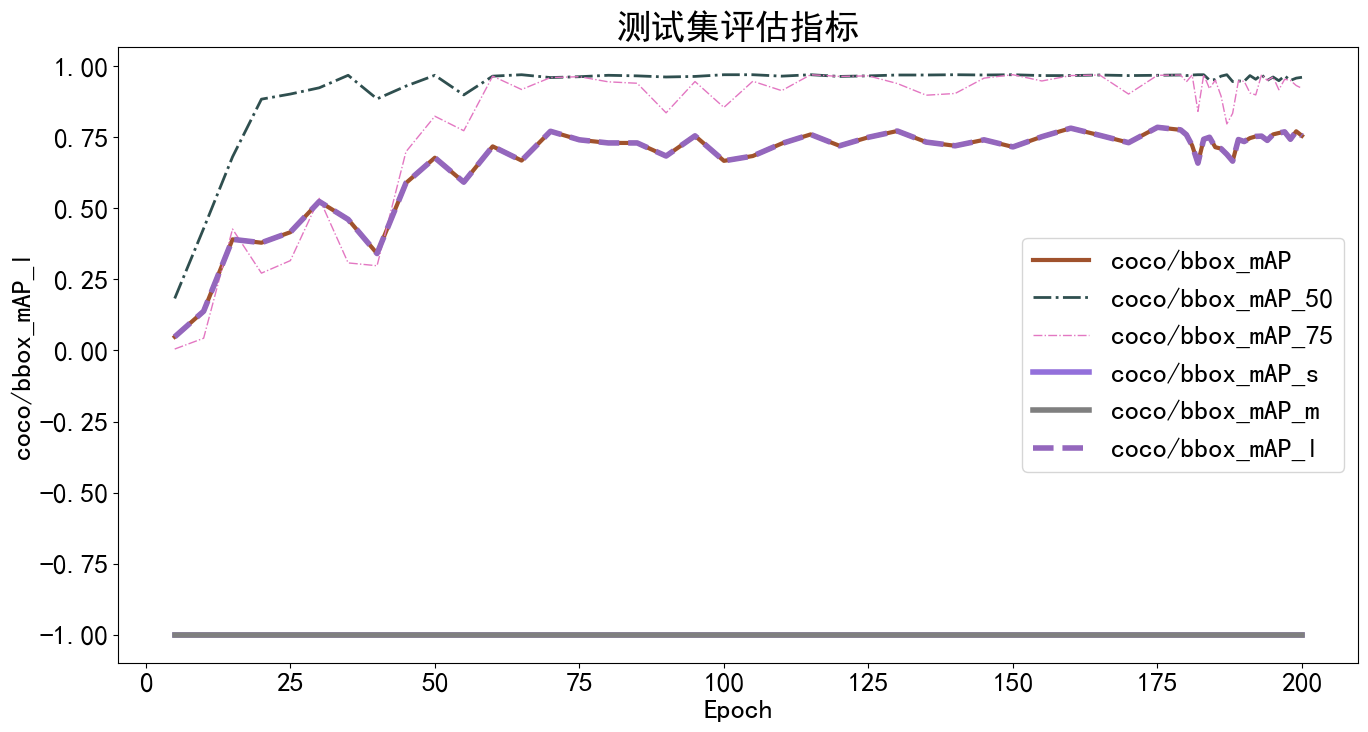

D:\Miniconda\Minicondaanzhuang\envs\pytorchgpu\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


06/04 15:33:58 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.9.16 (main, Mar  8 2023, 10:39:24) [MSC v.1916 64 bit (AMD64)]
    CUDA available: True
    numpy_random_seed: 1521475340
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: None
    MSVC: 用于 x64 的 Microsoft (R) C/C++ 优化编译器 19.30.30706 版
    GCC: n/a
    PyTorch: 2.0.1+cu117
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 199711
  - MSVC 193431937
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,cod

In [46]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

#### 模型轻量化转换

In [33]:
# Faster R CNN
!python tools/model_converters/publish_model.py \
        work_dirs/rtmdet_tiny_ear/epoch_200.pth \
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604.pth

06/04 15:40:30 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 15:40:30 - mmengine - INFO - Key `optimizer` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 15:40:30 - mmengine - INFO - Key `param_schedulers` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 15:40:30 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/04 15:40:30 - mmengine - INFO - The published model is saved at checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth.


### 预测

#### 预测单张图像

In [61]:
!python demo/image_demo.py \
        data/test_ear/ear3.jpg \
        data/rtmdet_tiny_ear.py \
        --weights checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth \
        --out-dir outputs/rtmdet_tiny_ear \
        --device cuda:0 \
        --pred-score-thr 0.3

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth
06/04 18:08:05 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
06/04 18:08:05 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.

Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------   
Inference ----------------------------------------  

#### 预测视频

In [62]:
!python demo/video_demo.py \
        data/test_ear/ear.mp4 \
        data/rtmdet_tiny_ear.py\
        checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth\
        --device cuda:0 \
        --score-thr 0.6 \
        --out outputs/ear_out_rtmdet.mp4

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_20230604-c9577ee7.pth
06/04 18:08:18 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
[                                                  ] 0/68, elapsed: 0s, ETA:
[                                  ] 1/68, 0.3 task/s, elapsed: 3s, ETA:   200s
[>                                 ] 2/68, 0.6 task/s, elapsed: 3s, ETA:   103s
[>                                 ] 3/68, 0.9 task/s, elapsed: 3s, ETA:    70s
[>>                                ] 4/68, 1.2 task/s, elapsed: 3s, ETA:    53s
[>>                                ] 5/68, 1.5 task/s, elapsed: 3s, ETA:    43s
[>>>                               ] 6/68, 1.7 task/s, elapsed: 4s, ETA:    37s
[>>>                               ] 7/68, 1.9 task/s, elapsed: 4s, ETA:    32s
[>>>>                              ] 8/68, 2.1 task/s, elapsed: 4s, ETA:    29s
[>>>>                              ] 9/68, 2.3 task/s, elapsed: 4s, ETA:   